In [1]:
from sklearn import datasets

In [2]:
digits=datasets.load_digits()

In [3]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

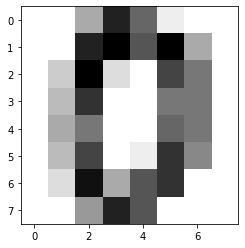

In [4]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)

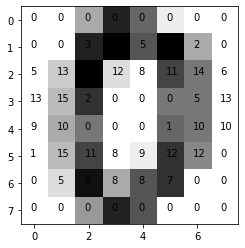

In [5]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
for i in range(0,8):
    for j in range(0,8):
        plt.gca().text(i-0.15,j,int(digits.images[0][i][j]))

In [6]:
import numpy as np

In [7]:
np.matrix.flatten(digits.images[0])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
np.matrix.flatten(digits.images[0])/15

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

In [9]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [10]:
v=np.matrix.flatten(digits.images[0]/15)
result=random_classifier(v)
result

array([0.80137933, 0.87772279, 0.72641182, 0.38228102, 0.09621887,
       0.08586899, 0.88146447, 0.80837544, 0.52505067, 0.34164021])

In [11]:
list(result).index(max(result))

6

In [12]:
digits.target[0]

0

In [13]:
def test_digit_classify(classifier,test_count=1000):
    correct=0
    for img,target in zip(digits.images[:test_count],digits.target[:test_count]):
        v=np.matrix.flatten(img)/15
        output=classifier(v)
        answer=list(output).index(max(output))
        if answer==target:
            correct+=1
    return (correct/test_count)

In [14]:
test_digit_classify(random_classifier)

0.105

In [15]:
test=np.array([5.00512567e-06, 3.94168539e-05, 5.57124430e-09, 9.31981207e-09,
       9.98060276e-01, 9.10328786e-07, 1.56262695e-03, 1.82976466e-04,
       1.48519455e-04, 2.54354113e-07])

In [16]:
list(test).index(max(test))

4

In [17]:
def average_img(i):
    imgs=[img for img,target in zip(digits.images[1000:],digits.target[1000:]) if target==i]
    return sum(imgs)/len(imgs)

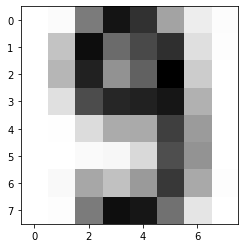

In [18]:
plt.imshow(average_img(9), cmap=plt.cm.gray_r)

In [19]:
len(digits.images)

1797

In [20]:
avg_digits=[np.matrix.flatten(average_img(i)) for i in range(10)]
def compare_to_avg(v):
    return [np.dot(v,avg_digits[i]) for i in range(10)]

In [21]:
test_digit_classify(compare_to_avg)

0.853

In [22]:
class MLP():
    def __init__(self,layer_sizes):
        self.layer_sizes=layer_sizes
        self.weights=[
            np.random.rand(n,m)
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:])
        ]
        self.biases=[np.random.rand(n)
                    for n in layer_sizes[1:]]

In [23]:
nn=MLP([2,3])
nn.weights

[array([[0.7675946 , 0.69165937],
        [0.15904032, 0.12298929],
        [0.96805611, 0.11233615]])]

In [24]:
nn.biases

[array([0.19892817, 0.18856664, 0.19702647])]

In [25]:
MLP([64,16,10])

In [26]:
a=[2,3]

[np.random.rand(n,m) for m,n in zip(a[:-1],a[1:])]

[array([[0.69574491, 0.93913559],
        [0.0086018 , 0.57732139],
        [0.19620827, 0.83277916]])]

In [27]:
test=MLP([3,4,3])

In [28]:
test.weights

[array([[0.98861812, 0.80947742, 0.6927311 ],
        [0.32913969, 0.80016523, 0.36441828],
        [0.23443958, 0.23985006, 0.75459359],
        [0.20191546, 0.83616191, 0.53002394]]),
 array([[0.55582778, 0.29517715, 0.91255291, 0.26073327],
        [0.74059417, 0.14355657, 0.85194883, 0.1487606 ],
        [0.95300523, 0.65748458, 0.12944506, 0.09233498]])]

In [29]:
test.biases

[array([0.21836741, 0.50852778, 0.61153182, 0.23417538]),
 array([0.7019837 , 0.74731045, 0.07523766])]

In [30]:
test_list=[3,4,2]

In [31]:
for m,n in zip(test_list[:-1],test_list[1:]):
    print(n,m)

4 3
2 4


In [32]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

In [33]:
class MLP():
    def __init__(self,layer_sizes):
        self.layer_sizes=layer_sizes
        self.weights=[
            np.random.rand(n,m)
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:])
        ]
        self.biases=[np.random.rand(n)
                    for n in layer_sizes[1:]]
        
    def feedforward(self,v):
        activations=[]
        a=v
        activations.append(a)
        for w,b in zip(self.weights,self.biases):
            z=w@a+b
            a=[sigmoid(x) for x in z]
            activations.append(a)
        return activations
    
    def evaluate(self,v):
        return np.array(self.feedforward(v)[-1])

In [34]:
nn=MLP([64,16,10])
v=np.matrix.flatten(digits.images[0])/15
nn.evaluate(v)

array([0.99999088, 0.99991554, 0.9997455 , 0.99938109, 0.99979947,
       0.9986791 , 0.99997635, 0.99987987, 0.99995313, 0.99978429])

In [35]:
test_digit_classify(nn.evaluate)

0.099

In [36]:
x=np.array([np.matrix.flatten(img) for img in digits.images[:1000]])/15.0

In [37]:
y=digits.target[:1000]

In [38]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(hidden_layer_sizes=(16,),
                 activation='logistic',
                 max_iter=100,
                 verbose=10,
                 random_state=1,
                 learning_rate_init=.1)

In [39]:
mlp.fit(x,y)

Iteration 1, loss = 2.21958598
Iteration 2, loss = 1.56912978
Iteration 3, loss = 0.98970277
Iteration 4, loss = 0.57473464
Iteration 5, loss = 0.34048448
Iteration 6, loss = 0.21495855
Iteration 7, loss = 0.14366771
Iteration 8, loss = 0.11077020
Iteration 9, loss = 0.08764273
Iteration 10, loss = 0.07193546
Iteration 11, loss = 0.06020348
Iteration 12, loss = 0.04961899
Iteration 13, loss = 0.03979645
Iteration 14, loss = 0.03334502
Iteration 15, loss = 0.02996006
Iteration 16, loss = 0.02603968
Iteration 17, loss = 0.02355514
Iteration 18, loss = 0.02137348
Iteration 19, loss = 0.01967878
Iteration 20, loss = 0.01751214
Iteration 21, loss = 0.01617330
Iteration 22, loss = 0.01460386
Iteration 23, loss = 0.01408517
Iteration 24, loss = 0.01270504
Iteration 25, loss = 0.01191634
Iteration 26, loss = 0.01114222
Iteration 27, loss = 0.01045989
Iteration 28, loss = 0.00983648
Iteration 29, loss = 0.00920912
Iteration 30, loss = 0.00890851
Iteration 31, loss = 0.00843426
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(16,),
              learning_rate_init=0.1, max_iter=100, random_state=1, verbose=10)

In [40]:
mlp.predict_proba(x)[0]

array([9.99809644e-01, 4.98753964e-11, 2.92965424e-06, 1.13759373e-07,
       1.65244724e-06, 2.78040785e-05, 5.37796139e-06, 9.19004720e-05,
       8.28762196e-08, 6.04946691e-05])

In [41]:
def sklearn_trained_classify(v):
    return mlp.predict_proba([v])[0]

In [42]:
test_digit_classify(sklearn_trained_classify)

1.0

In [43]:
def test_digit_classify(classifier,start=0,test_count=1000):
    correct=0
    end=start+test_count
    for img,target in zip(digits.images[start:end],digits.target[start:end]):
        v=np.matrix.flatten(img)/15
        output=classifier(v)
        answer=list(output).index(max(output))
        if answer==target:
            correct+=1
    return (correct/test_count)

In [44]:
test_digit_classify(sklearn_trained_classify,start=1000,test_count=500)

0.962

In [45]:
def y_vec(digit):
    return np.array([1 if i==digit else 0 for i in range(0,10)])

In [46]:
def cost_one(classifier,x,i):
    return sum([(classifier(x)[j]-y_vec(i)[j])**2 for j in range(10)])

In [47]:
def total_cost(classifier):
    return sum([cost_one(classifier,x[j],y[j]) for j in range(1000)])/1000.

In [48]:
total_cost(nn.evaluate)

8.994795866245521

In [49]:
total_cost(sklearn_trained_classify)

3.758338975066216e-05

In [50]:
nn=MLP([64,16,10])

In [52]:
nn.weights=[w.T for w in mlp.coefs_]

In [53]:
nn.biases=mlp.intercepts_

In [54]:
test_digit_classify(nn.evaluate,start=1000,test_count=500)

0.962

In [55]:
from sympy import *

In [56]:
X=symbols('x')

In [57]:
diff(1/(1+exp(-X)),X)

exp(-x)/(1 + exp(-x))**2